Group the data statewise and Count the number of colleges in each state.

In [27]:
import pandas as pd

data = pd.read_csv('/content/nirf_engg_ranking_india_2020.csv')
state_counts = data.groupby('state')['name'].count()
display(state_counts)

,name
state,
Andhra Pradesh,10
Arunachal Pradesh,2
Assam,3
Bihar,2
Chandigarh,2
Chhattisgarh,1
Delhi,7
Goa,1
Gujarat,7


Sort the records based on rpc attribute (Research Professional practices).


In [28]:
sorted_data = data.sort_values(by=['rpc'], ascending=[False])
sorted_data.head(10)

,institute_id,name,link,tlr,rpc,go,oi,perception,city,state,score,rank
1,IR-E-I-1074,Indian Institute of Technology Delhi,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,90.79,96.15,80.36,64.81,94.46,New Delhi,Delhi,88.08,2
0,IR-E-U-0456,Indian Institute of Technology Madras,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,95.42,94.64,83.90,61.31,100.00,Chennai,Tamil Nadu,89.93,1
2,IR-E-U-0306,Indian Institute of Technology Bombay,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,91.00,93.37,77.60,49.99,92.51,Mumbai,Maharashtra,85.08,3
4,IR-E-U-0573,Indian Institute of Technology Kharagpur,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,77.32,87.11,83.21,56.62,89.31,Kharagpur,West Bengal,80.56,5
3,IR-E-I-1075,Indian Institute of Technology Kanpur,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,86.22,82.08,88.44,54.21,85.78,Kanpur,Uttar Pradesh,82.18,4
5,IR-E-U-0560,Indian Institute of Technology Roorkee,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,77.21,76.57,89.65,61.71,60.55,Roorkee,Uttarakhand,76.29,6
6,IR-E-U-0053,Indian Institute of Technology Guwahati,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,83.04,70.73,83.03,59.13,62.45,Guwahati,Assam,74.90,7
14,IR-E-U-0490,Vellore Institute of Technology,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,56.79,64.06,63.07,58.21,46.29,Vellore,Tamil Nadu,59.32,15
11,IR-E-U-0205,Indian Institute of Technology (Indian School ...,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,64.02,63.12,72.11,55.07,39.78,Dhanbad,Jharkhand,62.06,12
16,IR-E-U-0575,Jadavpur University,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,53.73,62.04,76.45,40.45,51.61,Kolkata,West Bengal,59.23,17


Find the rank of Panjab University as per rpc attribute.

In [19]:
data['rpc_rank'] = data['rpc'].rank(ascending=False)

ranked_data = data.sort_values(by='rpc_rank')
ranked_data[['name', 'rpc', 'rpc_rank']].head(26)

,name,rpc,rpc_rank
1,Indian Institute of Technology Delhi,96.15,1.0
0,Indian Institute of Technology Madras,94.64,2.0
2,Indian Institute of Technology Bombay,93.37,3.0
4,Indian Institute of Technology Kharagpur,87.11,4.0
3,Indian Institute of Technology Kanpur,82.08,5.0
5,Indian Institute of Technology Roorkee,76.57,6.0
6,Indian Institute of Technology Guwahati,70.73,7.0
14,Vellore Institute of Technology,64.06,8.0
11,Indian Institute of Technology (Indian School ...,63.12,9.0
16,Jadavpur University,62.04,10.0


List the colleges whose rpc value is less than Panjab University and rank is higher(rank value is less).

In [29]:
data['rpc_rank'] = data['rpc'].rank(ascending=False)
pu_data = data[data['name'].str.contains('Panjab University', case=False, na=False)]
pu_rpc = pu_data['rpc'].values[0]
pu_rank = pu_data['rank'].values[0]

# Find colleges with rpc < Panjab University and rank < Panjab University's rank
filtered = data[(data['rpc'] < pu_rpc) & (data['rank'] < pu_rank)]

result = filtered[['name', 'rpc', 'rank']].sort_values(by='rank')
display(result)

,name,rpc,rank
18,National Institute of Technology Warangal,38.12,19
21,Indian Institute of Technology Bhubaneswar,37.17,22
22,National Institute of Technology Calicut,31.30,23
23,Indian Institute of Technology Gandhinagar,34.55,24
24,Indian Institute of Technology Ropar,30.54,25
25,Indian Institute of Technology Patna,39.24,26
29,Birla Institute of Technology & Science,34.87,30
30,Indian Institute of Technology Mandi,36.80,31
32,Indian Institute of Space Science and Technology,24.02,33
33,Siksha `O` Anusandhan,29.41,34


Draw the Histogram for colleges based on tlr values by dividing the overall data in 10 bins.

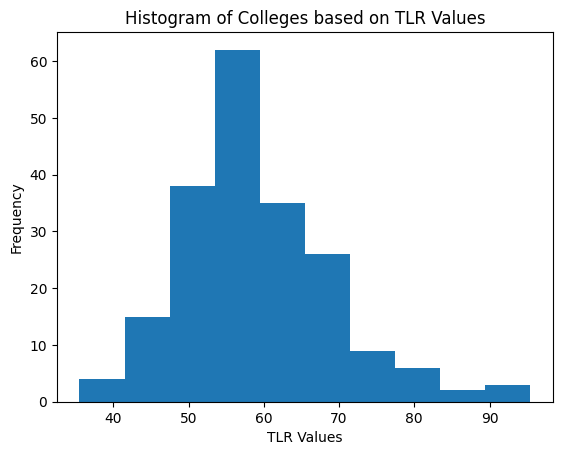

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
plt.hist(data['tlr'], bins=10)
plt.xlabel('TLR Values')
plt.ylabel('Frequency')
plt.title('Histogram of Colleges based on TLR Values')
plt.show()